# CSC529 Assignment 4
## Matt Triano

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
from IPython.display import display
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline

In [2]:
data_raw = pd.read_csv('spambase.csv')
spam_labels = data_raw['spam']
data_df = data_raw.drop('spam', axis=1)
display(data_df.head(5))
display(spam_labels.head(5))
display(data_raw.shape)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

(4601, 58)

In [3]:
data_df.describe()
# type(spam_labels)
data_raw.describe()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


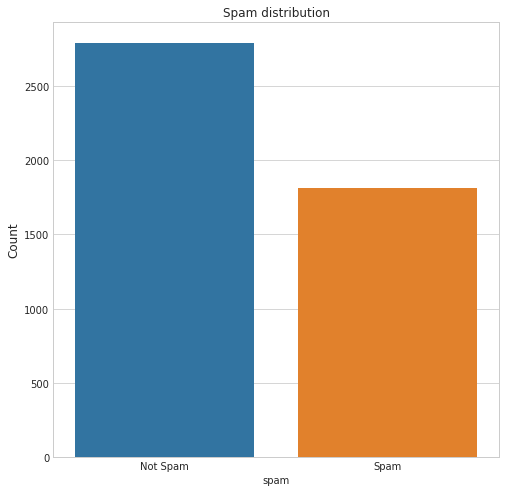

In [4]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax0 = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
    sns.countplot(x='spam', data=data_raw, ax=ax0)
    ax0.set_ylabel('Count', fontsize=12)
    ax0.set_xticklabels(['Not Spam', 'Spam'])    
    ax0.set_title('Spam distribution')

In [20]:
def print_clf_grid_stats(grid_clf, gamma=False, wantPrint=True):
    print('C value that produces the most accurate model: {}'.format(grid_clf.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(grid_clf.best_score_))
    means = grid_clf.cv_results_['mean_test_score']
    stdevs = grid_clf.cv_results_['std_test_score']
    c_list_ = []
    g_list_ = []
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different C values ---')
    for mean, stdev, param in zip(means, stdevs, grid_clf.cv_results_['params']):
        c_list_.append(param['C'])
        if gamma:
            g_list_.append(param['gamma'])
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with parameters {}'
                  .format(mean, stdev, param))
    return means, stdevs, c_list_, g_list_

In [34]:
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data_df)

In [24]:
param_lin = [
  {'C': [5e-05, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5, 1, 100],
  'loss': ['hinge']}
]
svm_clf = LinearSVC()

In [36]:
svm_lin_clf_grid = GridSearchCV(svm_clf, param_lin, verbose=9, cv=10, n_jobs=-1)

%time svm_lin_clf_grid.fit(scaled_data_df, spam_labels.values)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  97 out of 100 | elapsed:    7.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished


Wall time: 9.35 s


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'loss': ['hinge'], 'C': [5e-05, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [37]:
score_means, score_stdevs, c_list, _ = print_clf_grid_stats(svm_lin_clf_grid)

C value that produces the most accurate model: {'loss': 'hinge', 'C': 1}
Score of the most accurate model: 0.920235 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.891 (+/- 0.044) for the model with parameters {'loss': 'hinge', 'C': 5e-05}
0.887 (+/- 0.027) for the model with parameters {'loss': 'hinge', 'C': 0.0005}
0.895 (+/- 0.023) for the model with parameters {'loss': 'hinge', 'C': 0.001}
0.912 (+/- 0.019) for the model with parameters {'loss': 'hinge', 'C': 0.005}
0.915 (+/- 0.021) for the model with parameters {'loss': 'hinge', 'C': 0.01}
0.913 (+/- 0.028) for the model with parameters {'loss': 'hinge', 'C': 0.05}
0.913 (+/- 0.030) for the model with parameters {'loss': 'hinge', 'C': 0.1}
0.914 (+/- 0.032) for the model with parameters {'loss': 'hinge', 'C': 0.5}
0.920 (+/- 0.028) for the model with parameters {'loss': 'hinge', 'C': 1}
0.905 (+/- 0.032) for the model with parameters {'loss': 'hinge', 'C': 100}


In [53]:
param_rbf = [
  {'C': [0.01, 0.1, 1, 10, 50, 100], 
   'gamma': [5e-05, 1e-04, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5]
  }]
rbf_svm_clf = SVC()

In [54]:
svm_rbf_clf_grid = GridSearchCV(rbf_svm_clf, param_rbf, verbose=9, cv=3, n_jobs=-1)

%time svm_rbf_clf_grid.fit(scaled_data_df, spam_labels)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   54.5s finished


Wall time: 55.7 s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'C': [0.01, 0.1, 1, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [55]:
rbf_means, rbf_stdevs, rbf_Cs, rbf_gammas = print_clf_grid_stats(svm_rbf_clf_grid, gamma=True, wantPrint=True)

C value that produces the most accurate model: {'gamma': 0.001, 'C': 50}
Score of the most accurate model: 0.926538 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.606 (+/- 0.000) for the model with parameters {'gamma': 5e-05, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 0.0001, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 0.0005, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 0.001, 'C': 0.01}
0.610 (+/- 0.003) for the model with parameters {'gamma': 0.005, 'C': 0.01}
0.670 (+/- 0.030) for the model with parameters {'gamma': 0.01, 'C': 0.01}
0.610 (+/- 0.006) for the model with parameters {'gamma': 0.05, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 0.1, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 0.5, 'C': 0.01}
0.606 (+/- 0.000) for the model with parameters {'gamma': 5e-05, 'C': 0.1}
0.606 (+/- 0.000) for the model with parameters {'gamm

In [68]:
# rbf_means.shape
# rbf_Cs
# rbf_gammas
rbf_mean_dict = {'mean_acc': rbf_means,
                 'sigma':sigma_list,
                 'C': rbf_Cs}
rbf_mean_df = pd.DataFrame(rbf_mean_dict)

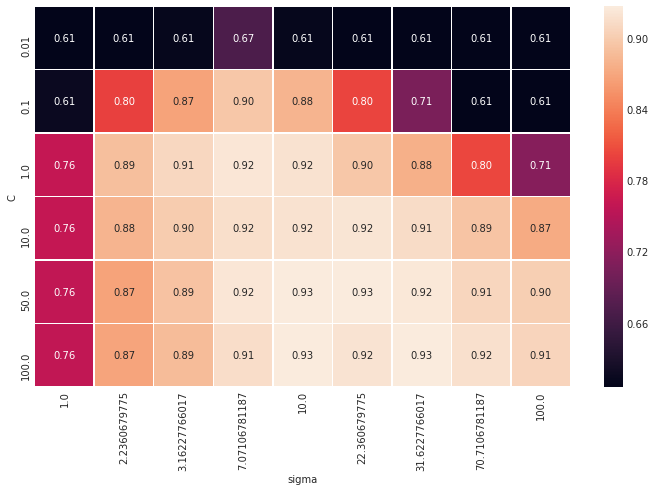

In [85]:
rbf_mean_piv = rbf_mean_df.pivot(index='C', values='mean_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(12,7))
    ax = sns.heatmap(rbf_mean_piv, linewidths=0.5, annot=True, fmt='0.2f')

In [56]:
# Apparently Seaborn's tsplot will be deprecated, so I made just made a similar
#  plot using matplotlib (Seaborn is just a nice wrapper for matplotlib anyway)
def errorbar_lineplot(ax, x, y, stdev, **kw):
    c_intervals = (y - stdev, y + stdev)
    ax.fill_between(x, c_intervals[0], c_intervals[1], alpha=0.2, **kw)
    ax.plot(x, y, **kw)

In [59]:
gamma2sigma = lambda x: np.sqrt(1/(2*x))
sigmafier = np.vectorize(gamma2sigma)
sigma_list = sigmafier(rbf_gammas)

In [62]:
rbf_dict = {'mean_acc': rbf_means,
          'mean_std': rbf_stdevs,
          'sigma':sigma_list,
          'C': rbf_Cs}
rbf_df = pd.DataFrame(rbf_dict)
rbf_df = rbf_df.sort_values('sigma')
rbf_df_bestC = rbf_df[rbf_df['C']==0.15]
rbf_df_bestC
np.unique(rbf_Cs)

array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   5.00000000e+01,   1.00000000e+02])

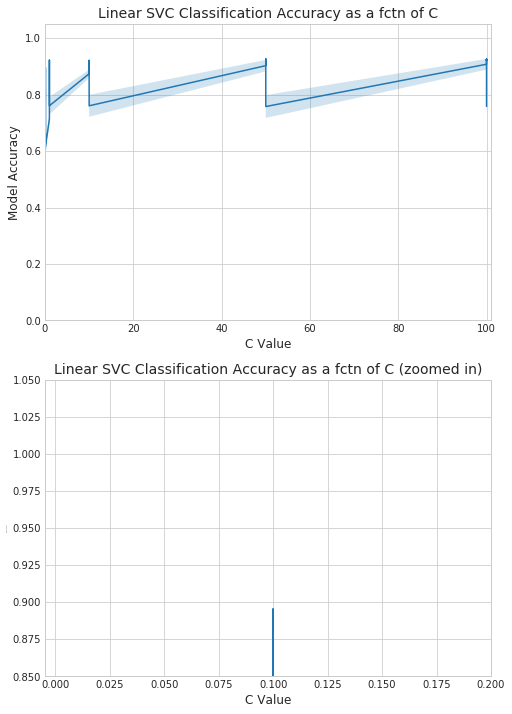

In [58]:
df_ = gauss_df[gauss_df['C']==0.005]
with plt.style.context('seaborn-whitegrid'):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(8,12))
    errorbar_lineplot(ax1, rbf_Cs, rbf_means, rbf_stdevs)
    ax1.set_xlabel('C Value', fontsize=12)
    ax1.set_ylabel('Model Accuracy', fontsize=12)
    ax1.set_ylim([0.0,1.05])
    ax1.set_xlim([-0.1,101])
    ax1.set_title('Linear SVC Classification Accuracy as a fctn of C', fontsize=14)
    errorbar_lineplot(ax2, rbf_Cs, rbf_means, rbf_stdevs)
    ax2.set_xlabel('C Value', fontsize=12)
    ax2.set_ylabel('Model Accuracy', fontsize=1)
    ax2.set_ylim([0.85,1.05])
    ax2.set_xlim([-0.005,0.2])
    ax2.set_title('Linear SVC Classification Accuracy as a fctn of C (zoomed in)', fontsize=14)

In [13]:
LinearSVC().get_params().keys()

dict_keys(['dual', 'class_weight', 'loss', 'tol', 'penalty', 'intercept_scaling', 'random_state', 'verbose', 'fit_intercept', 'max_iter', 'C', 'multi_class'])

In [13]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - Anything accepted by `